In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

df=pd.read_csv(r'D:\DS_Amazon_Music_Clustering\Documents\single_genre_artists.csv')



In [3]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,acousticness,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.993,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.989,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.995,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.991,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.991,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22


In [4]:
df.columns

Index(['id_songs', 'name_song', 'popularity_songs', 'duration_ms', 'explicit',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'followers', 'genres',
       'name_artists', 'popularity_artists'],
      dtype='object')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95837 entries, 0 to 95836
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95837 non-null  object 
 1   name_song           95837 non-null  object 
 2   popularity_songs    95837 non-null  int64  
 3   duration_ms         95837 non-null  int64  
 4   explicit            95837 non-null  int64  
 5   id_artists          95837 non-null  object 
 6   release_date        95837 non-null  object 
 7   danceability        95837 non-null  float64
 8   energy              95837 non-null  float64
 9   key                 95837 non-null  int64  
 10  loudness            95837 non-null  float64
 11  mode                95837 non-null  int64  
 12  speechiness         95837 non-null  float64
 13  acousticness        95837 non-null  float64
 14  instrumentalness    95837 non-null  float64
 15  liveness            95837 non-null  float64
 16  vale

In [6]:
# As per the data No Null values are present 
df.isnull().sum()

id_songs              0
name_song             0
popularity_songs      0
duration_ms           0
explicit              0
id_artists            0
release_date          0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
time_signature        0
followers             0
genres                0
name_artists          0
popularity_artists    0
dtype: int64

In [7]:
# Data consists non english values , special CHAR which, Since i am not going to use this feature
# Will be deleting the feature 
df['name_song'].value_counts()

name_song
Bibi Blocksberg Lied                                                                                   33
Intro                                                                                                  20
Benjamin Blümchen Lied                                                                                 19
Time                                                                                                   14
Lonely                                                                                                 14
                                                                                                       ..
春回大地贺新年                                                                                                 1
春联红                                                                                                     1
Brown Noise                                                                                             1
Fifth Sunday of Lent, Year C: Has No

In [8]:
df['release_date'].unique()

array(['1922', '1924', '1925', ..., '1968-12-12', '1996-02-16',
       '2009-11-28'], shape=(10436,), dtype=object)

In [9]:
df['duration_ms'].unique()

array([161427, 223440, 208267, ..., 276342, 265846, 185250],
      shape=(44685,))

In [10]:
df['release_date'].unique()

array(['1922', '1924', '1925', ..., '1968-12-12', '1996-02-16',
       '2009-11-28'], shape=(10436,), dtype=object)

In [11]:
# Considering Silicing meathod for creating new column "release_year"
df['release_year'] = df['release_date'].astype(str).str[:4].astype(int)


In [12]:
df['release_year'].unique()

array([1922, 1924, 1925, 1926, 1927, 1928, 1929, 1931, 1935, 1991, 1923,
       1930, 1932, 1990, 1933, 1934, 1959, 1955, 2010, 1954, 1997, 2013,
       1936, 1937, 1949, 1956, 1953, 1940, 1999, 1958, 1960, 1970, 1962,
       1963, 1968, 1971, 1986, 1950, 1939, 1947, 1952, 1994, 1992, 1942,
       1972, 1948, 1951, 1945, 1941, 1943, 1944, 1974, 2002, 1998, 2008,
       2018, 2011, 2014, 1946, 1938, 2004, 2015, 1980, 1977, 1957, 1975,
       2017, 1967, 1965, 1973, 1964, 1961, 1966, 1985, 2005, 1993, 1976,
       2000, 1981, 1982, 1995, 2007, 2009, 2016, 2020, 1988, 2006, 1983,
       1987, 1978, 1996, 1969, 1979, 2001, 1989, 1984, 2003, 2012, 2021,
       2019, 1900])

In [13]:


df['duration_min'] = (df['duration_ms'] / 60000).astype(float)

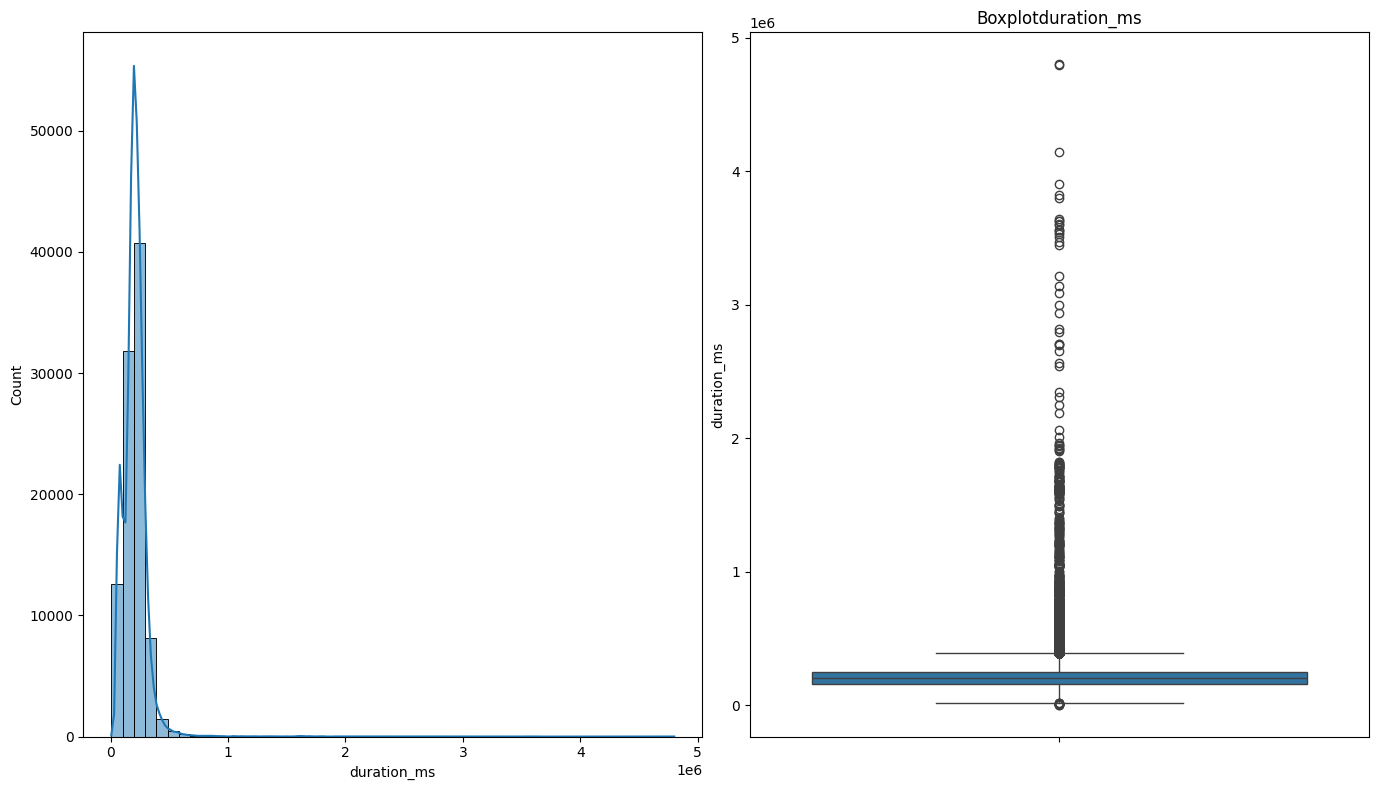

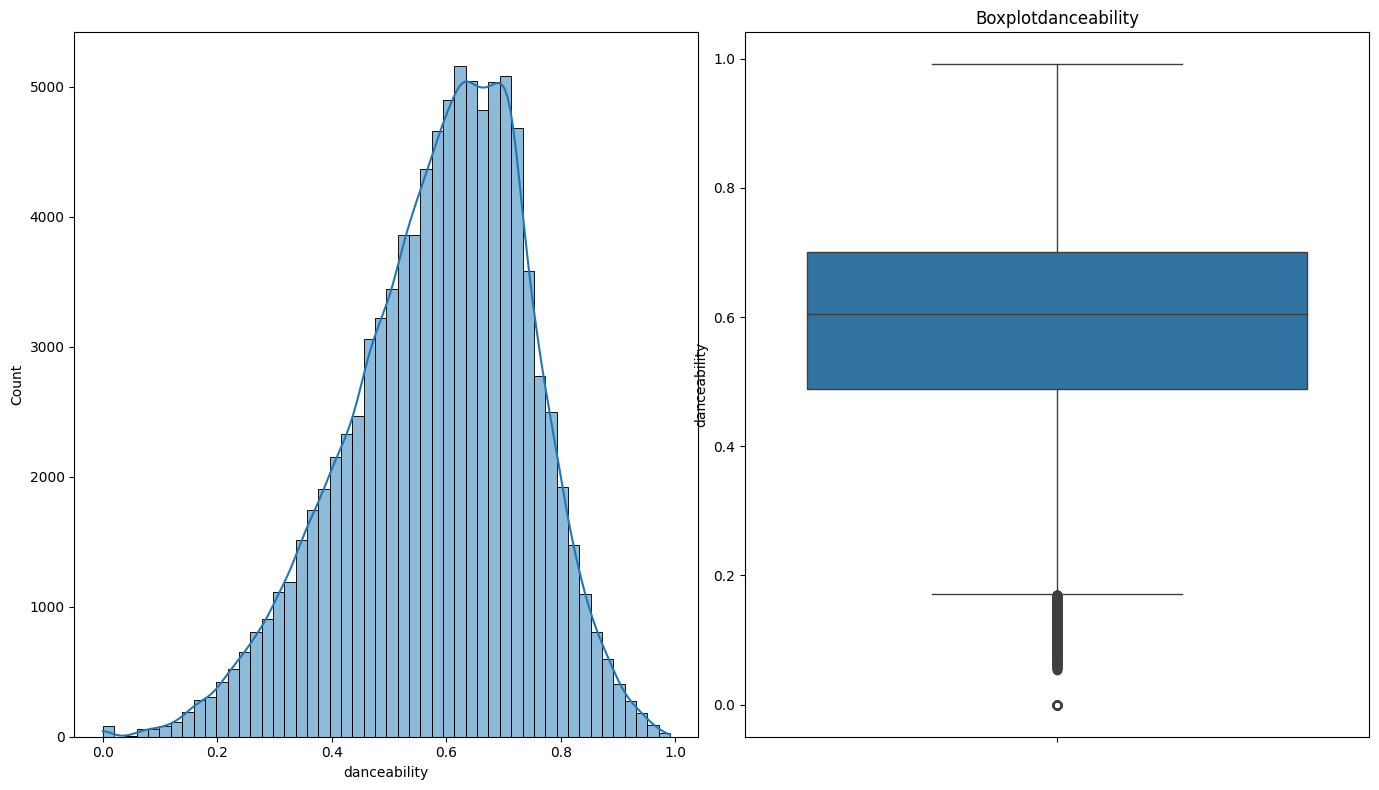

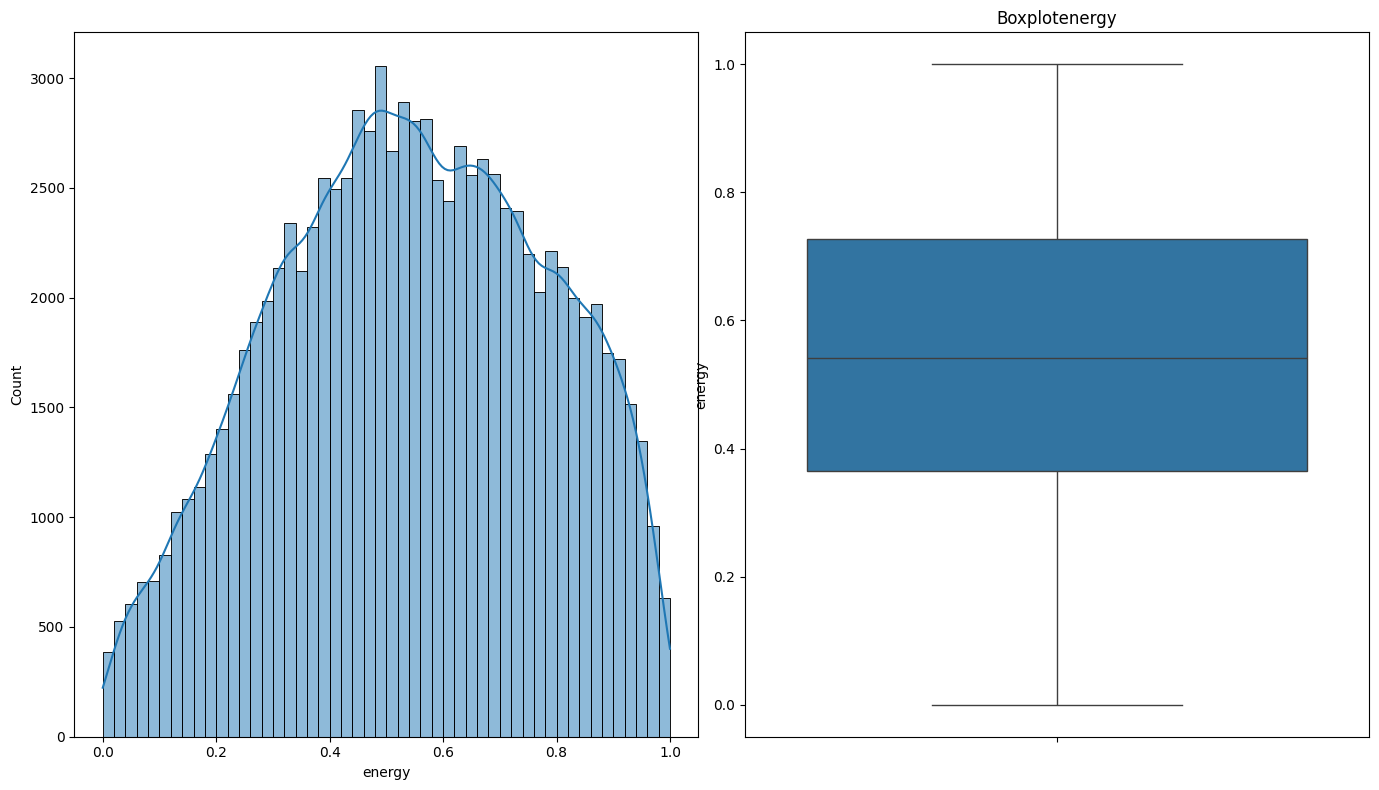

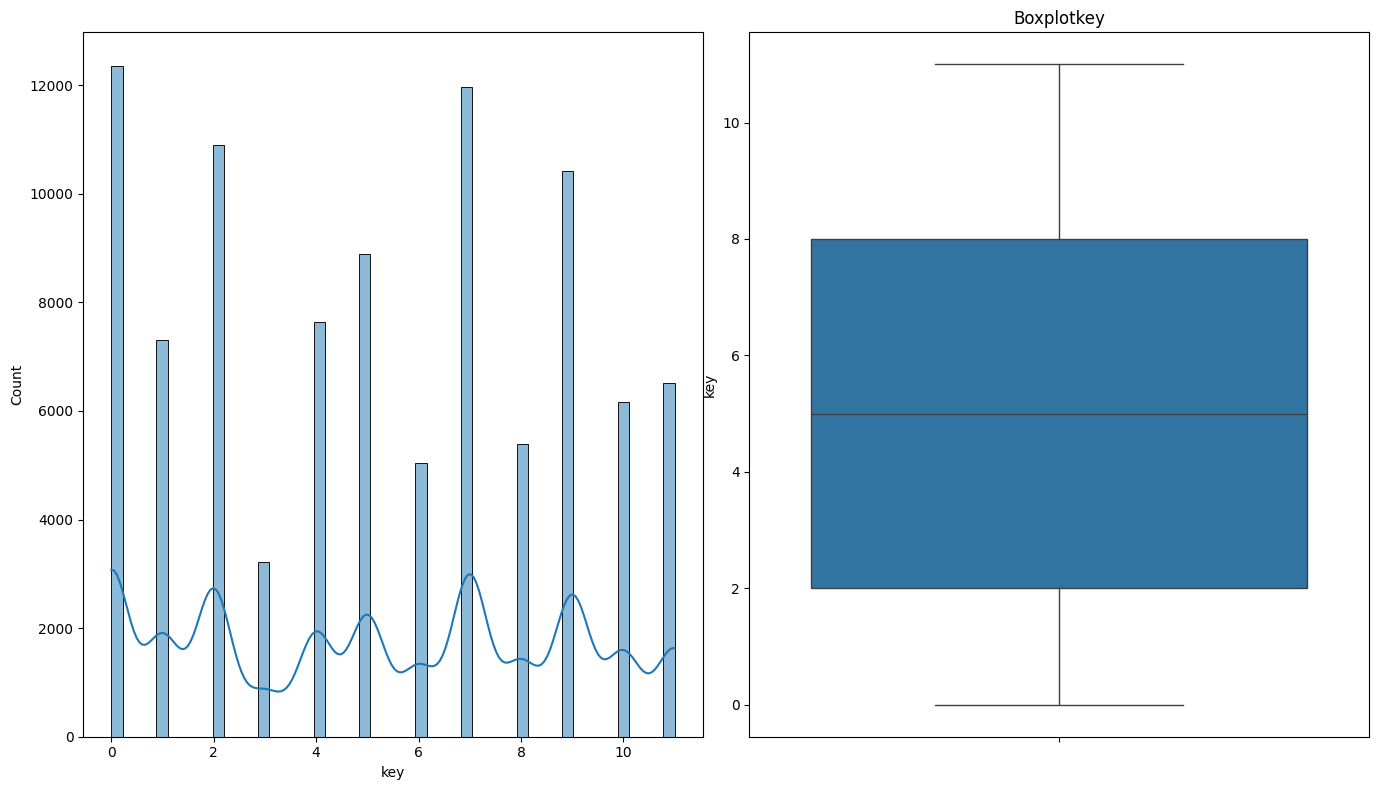

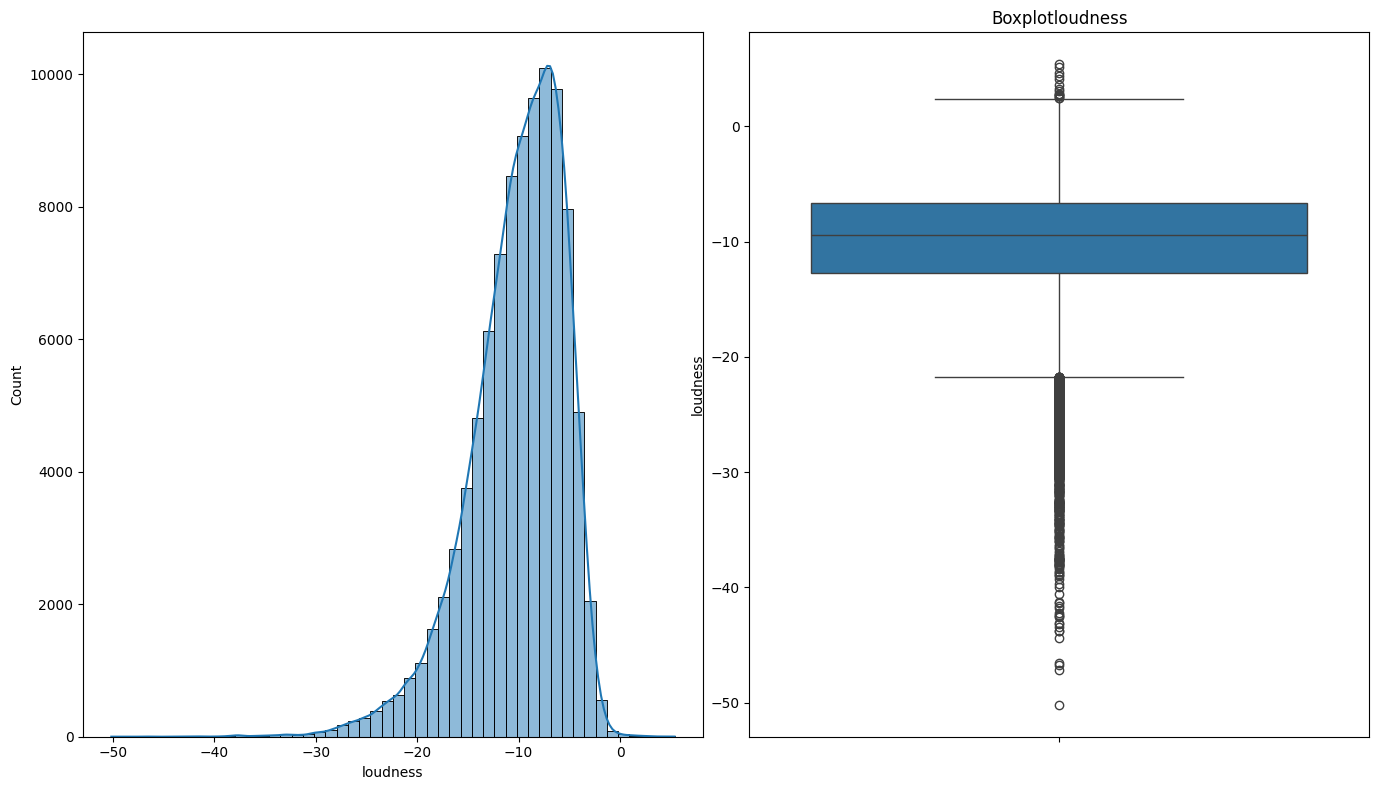

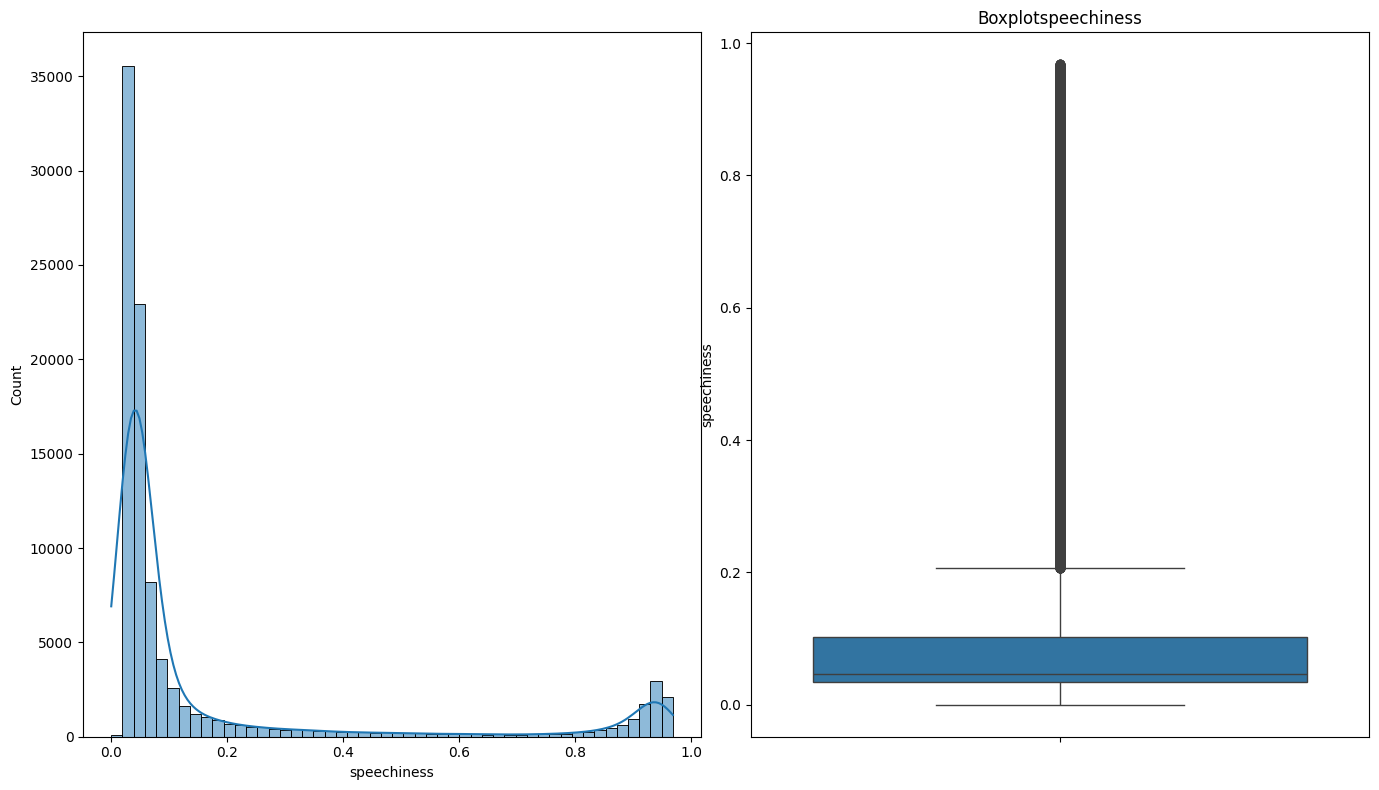

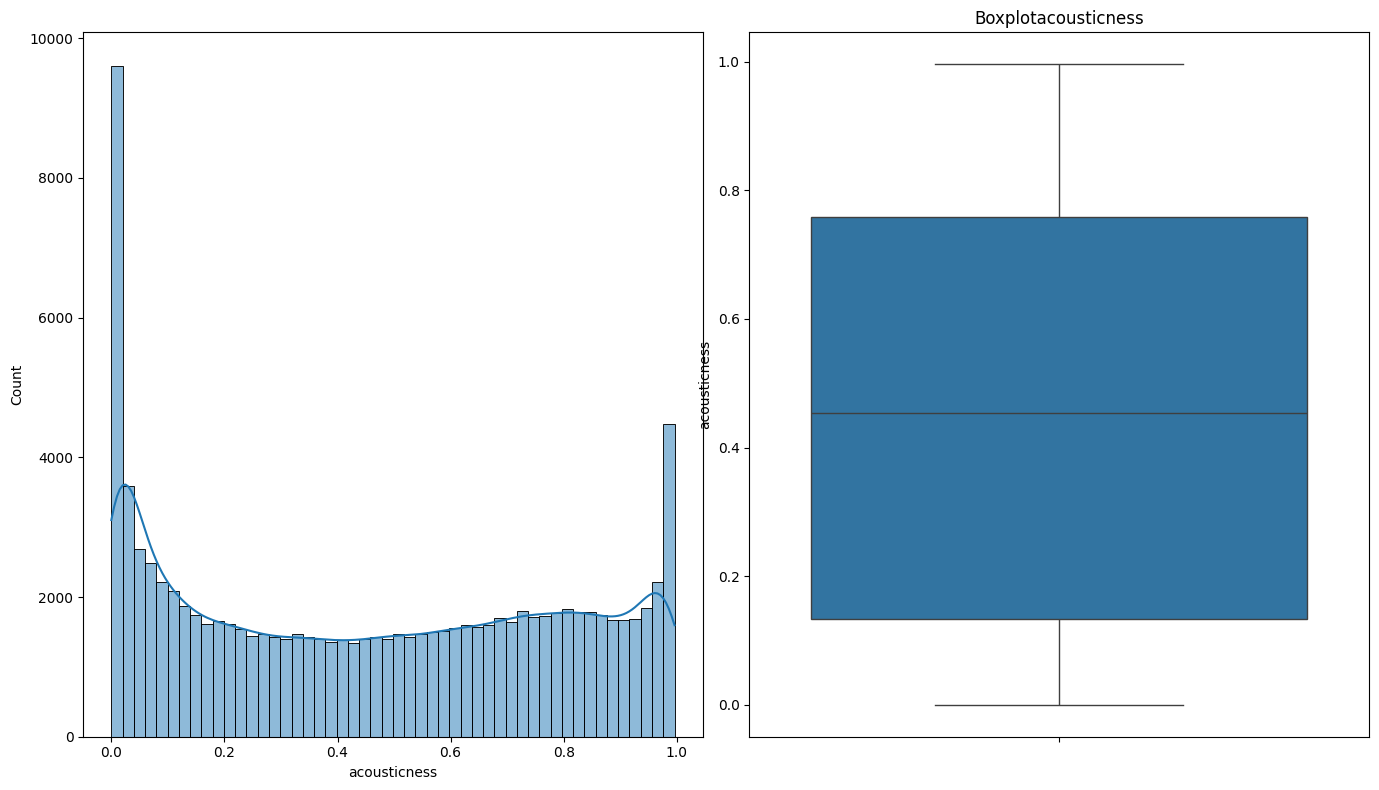

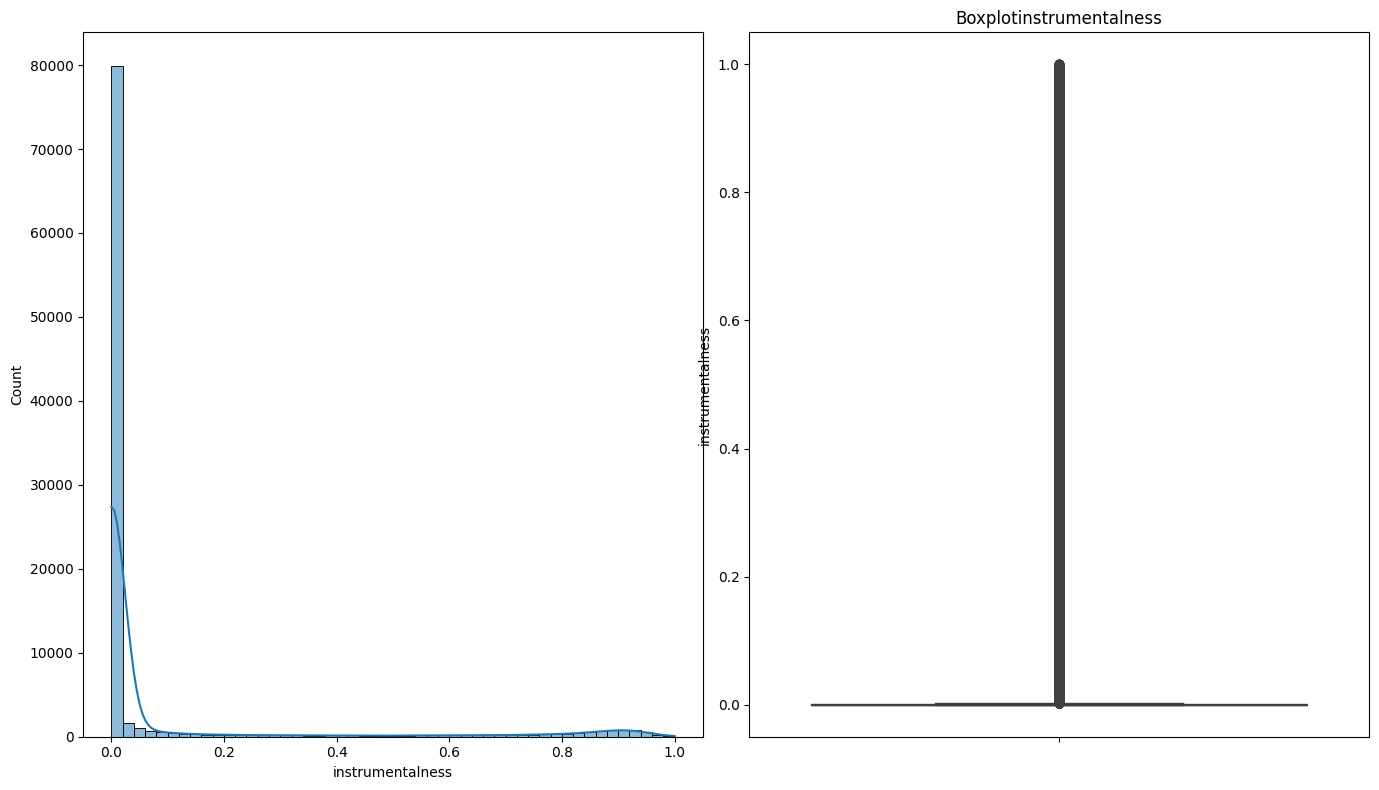

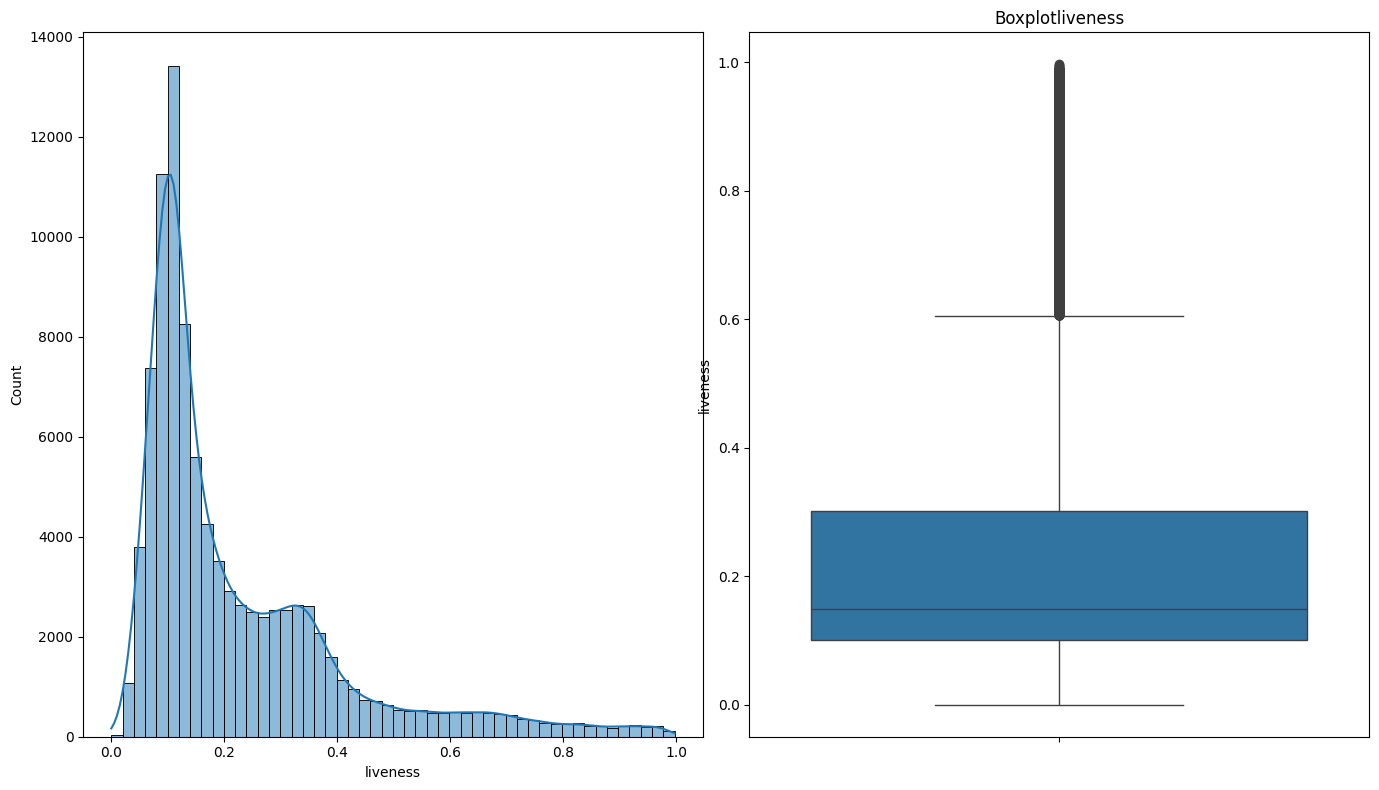

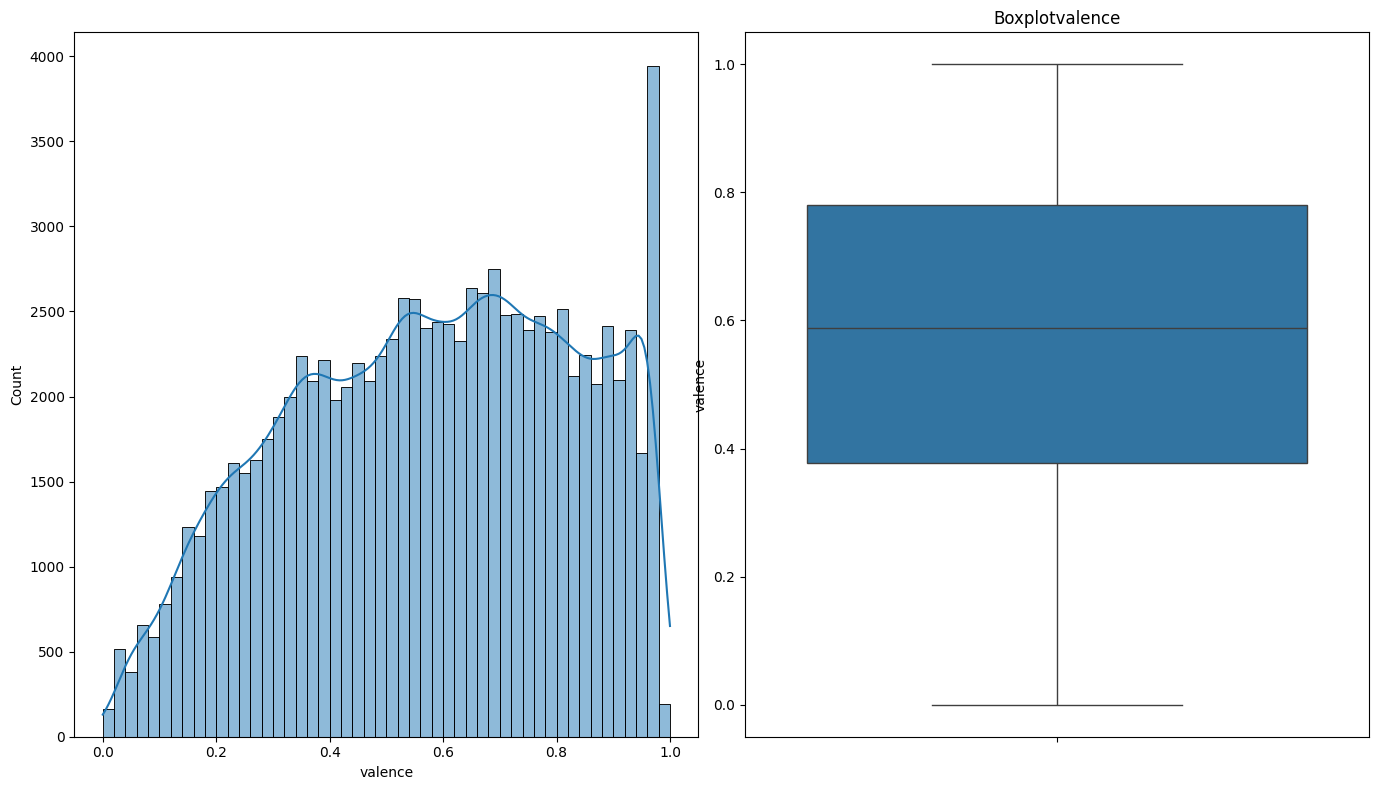

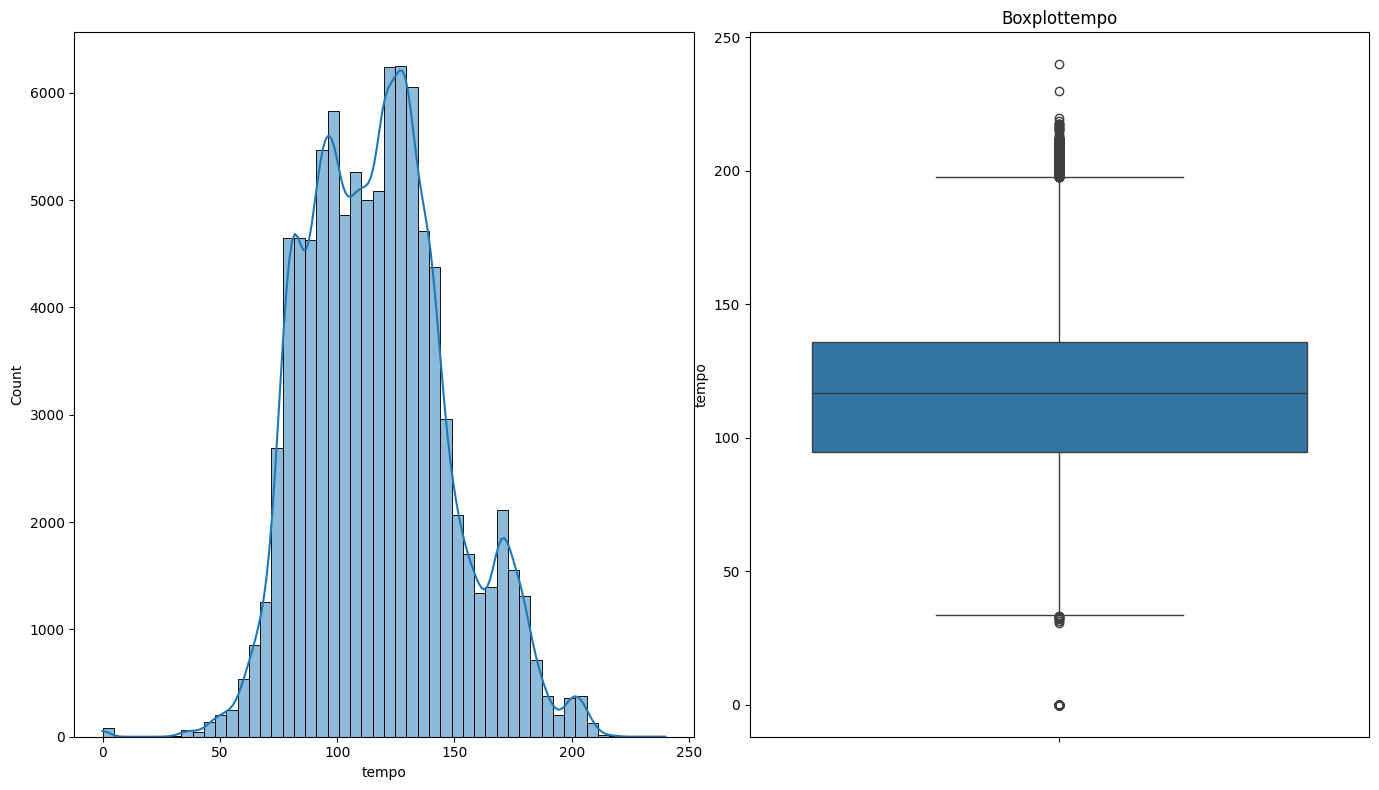

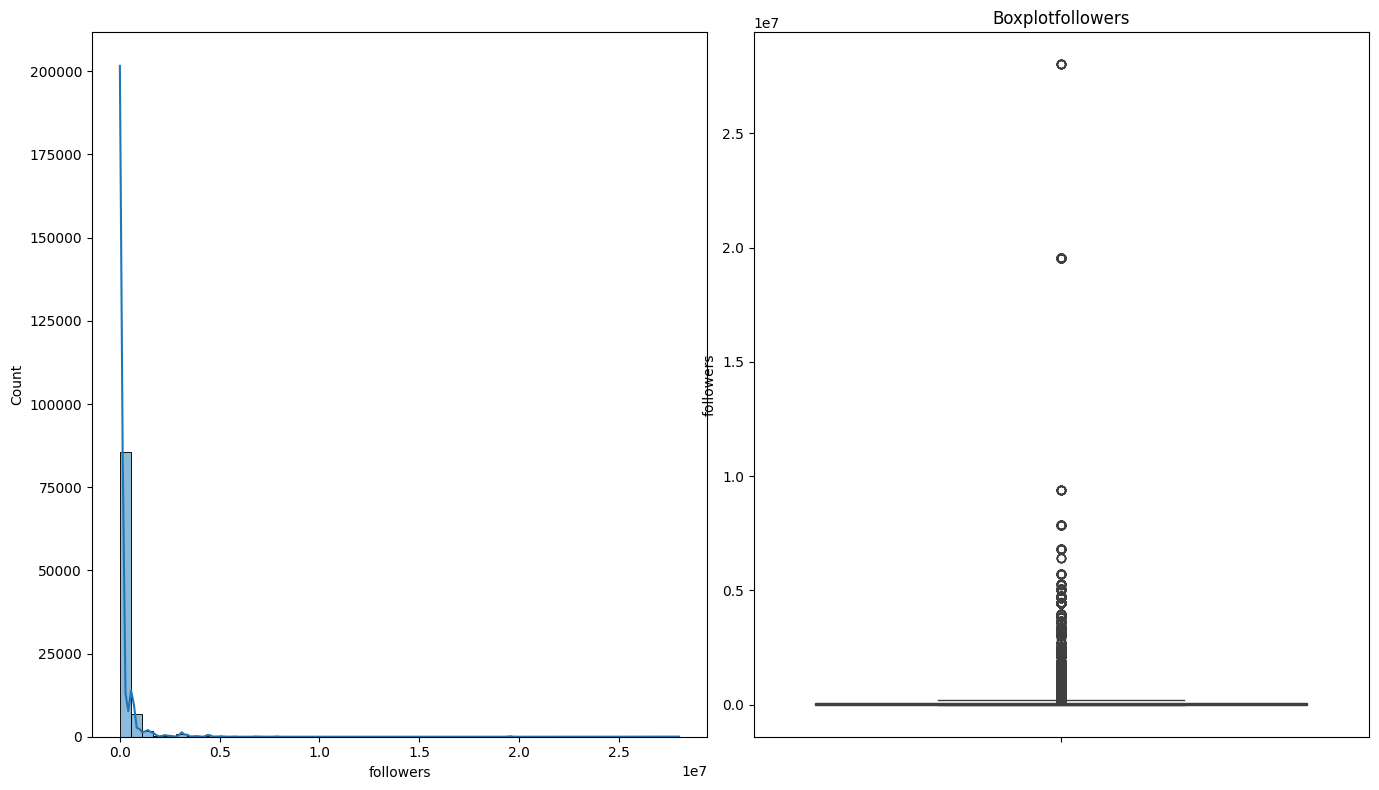

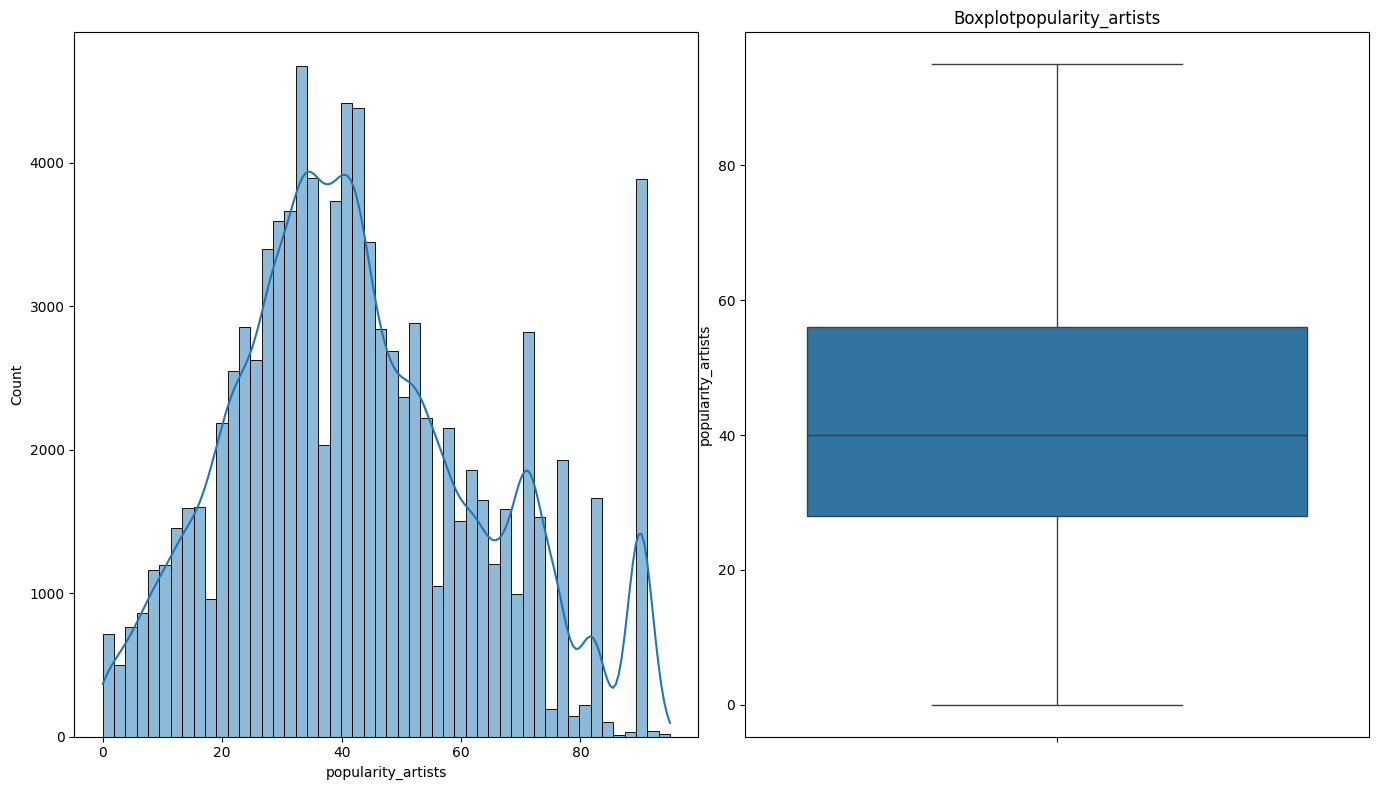

In [14]:
ploting=['duration_ms', 'danceability', 'energy',
       'key', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo',
       'followers', 'popularity_artists',]
for col in ploting:
    fig, axes = plt.subplots(1, 2, figsize=(14,8))
    sns.histplot(data=df, x=col, bins=50, kde=True, ax=axes[0])
    plt.title(f'Histplot{col}')
    plt.tight_layout()
    sns.boxplot(data=df,y=col,ax=axes[1])
    plt.title(f'Boxplot{col}')
    plt.tight_layout
              


In [15]:
# ±3 standard deviations of the mean — a classic threshold that retains ~99.7% of normally distributed data.
from scipy.stats import zscore
z_scores = zscore(df['danceability'])
df = df[(abs(z_scores) < 3)] # type: ignore


In [16]:
zscores=zscore(df['tempo'])
df=df[(abs(zscores)<3)]

In [17]:
df['release_year'] = df['release_year'].astype(int)

In [18]:
# Created column "Song_mask" for easy mapping of the Song_Id 
df['song_mask'] = ['song' + str(i+1) for i in range(len(df))]

In [19]:
df.head()

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,release_year,duration_min,song_mask
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22,1922,2.690450,song1
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22,1922,3.724000,song2
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22,1922,3.471117,song3
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22,1924,2.698883,song4
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22,1924,2.799550,song5


In [20]:
df.set_index('song_mask', inplace=True)

In [21]:
df.tail(10)

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,release_year,duration_min
song_mask,,,,,,,,,,,,,,,,,,,,,
song95421,3vdHJXN7wYG0g2uB8QyfrS,Into the Woods,47,134250,0,7qKxhFTGcJ7w7JEFGqqWwK,2017-03-31,0.639,0.1230,9,...,0.0866,0.511,92.451,4,10356.0,['piano cover'],Piano Peace,66,2017,2.237500
song95422,0XwXxgC5qyCF6PoyAREAzK,Soothing Dog Music,56,45733,0,1Cj9j44XMhQeNHAwWJRCKd,2018-12-24,0.278,0.0614,5,...,0.1240,0.132,75.139,4,5297.0,['pet calming'],Sleepy Dogs,74,2018,0.762217
song95423,2goIIAg5kdzfwclJMFZM33,Everything,64,267429,0,7u7MDzwo7VtVe7FhS3cq8Y,2018-04-10,0.609,0.6810,10,...,0.0845,0.386,140.038,4,41065.0,['gaming edm'],Diamond Eyes,58,2018,4.457150
song95424,1RoZ5L7XmEnLX9IJFgnUws,我承认我自卑,46,269349,0,6ok813AZNboZFozd0HEahX,2019-10-15,0.642,0.6500,8,...,0.3130,0.364,172.058,4,4090.0,['chinese manyao'],杨小壮,39,2019,4.489150
song95425,7GRImTchCheEHqU3tong8Q,别丢下我不管,45,276342,0,0zN0U0VBtfk6OLfY6Hrjd7,2019-03-08,0.576,0.4650,1,...,0.1240,0.362,81.965,4,2279.0,['chinese viral pop'],风小筝,33,2019,4.605700
song95426,44r4zta6P9flkhKaVnbsvG,Freaks,70,174800,0,14Y3trk7LaslSFTk1G35rx,2019-02-25,0.674,0.5680,1,...,0.1650,0.640,166.107,4,16057.0,['alt z'],Jordan Clarke,56,2019,2.913333
song95427,0MmaEacabpK8Yp3Mdeo5uY,下雨天,50,265846,0,5VGgFE9nPgMfEnYiPT5J2B,2020-02-25,0.528,0.6730,4,...,0.0989,0.297,130.066,4,929.0,['chinese viral pop'],芝麻,36,2020,4.430767
song95428,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,67,82500,0,7vgGpuiXdNlCmc994PlMlz,2020-10-30,0.609,0.0172,8,...,0.1080,0.890,68.619,4,23.0,['instrumental lullaby'],Laureen Conrad,52,2020,1.375000
song95429,0SjsIzJkZfDU7wlcdklEFR,John Brown's Song,66,185250,0,4MxqhahGRT4BPz1PilXGeu,2020-03-20,0.562,0.0331,1,...,0.1110,0.386,63.696,3,91.0,['instrumental lullaby'],Gregory Oberle,55,2020,3.087500


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95430 entries, song1 to song95430
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_songs            95430 non-null  object 
 1   name_song           95430 non-null  object 
 2   popularity_songs    95430 non-null  int64  
 3   duration_ms         95430 non-null  int64  
 4   explicit            95430 non-null  int64  
 5   id_artists          95430 non-null  object 
 6   release_date        95430 non-null  object 
 7   danceability        95430 non-null  float64
 8   energy              95430 non-null  float64
 9   key                 95430 non-null  int64  
 10  loudness            95430 non-null  float64
 11  mode                95430 non-null  int64  
 12  speechiness         95430 non-null  float64
 13  acousticness        95430 non-null  float64
 14  instrumentalness    95430 non-null  float64
 15  liveness            95430 non-null  float64
 16  v

In [23]:
df.head(1)

,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,release_year,duration_min
song_mask,,,,,,,,,,,,,,,,,,,,,
song1,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22,1922,2.69045


In [24]:
df1=df.copy()

In [25]:
#Dropping some of the columns  
df1.drop([
    "name_song", "popularity_songs", "explicit", "id_artists", "release_date",
    "mode", "key", "time_signature", "genres", "name_artists", "id_songs",
    
], axis=1, inplace=True)


In [26]:
df1

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,popularity_artists,release_year,duration_min
song_mask,,,,,,,,,,,,,,
song1,161427,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,5078.0,22,1922,2.690450
song2,223440,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,5078.0,22,1922,3.724000
song3,208267,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,5078.0,22,1922,3.471117
song4,161933,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,5078.0,22,1924,2.698883
song5,167973,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,5078.0,22,1924,2.799550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
song95426,174800,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,16057.0,56,2019,2.913333
song95427,265846,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,929.0,36,2020,4.430767
song95428,82500,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,23.0,52,2020,1.375000


In [27]:
col_to_scale = df1.select_dtypes(include=['int64', 'float64']).columns
col_to_scale

Index(['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'followers', 'popularity_artists', 'release_year', 'duration_min'],
      dtype='object')

In [28]:
#  StandardScaler (important for distance-based methods)

from sklearn.preprocessing import StandardScaler

Col_scaled = df1[['danceability', 'energy', 'loudness', 'speechiness',
                  'acousticness', 'instrumentalness', 'liveness', 'valence']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Col_scaled)
scaled_df = pd.DataFrame(X_scaled, columns=Col_scaled.columns, index=df1.index)

In [29]:
X_scaled

array([[-0.16788869, -1.51929336, -0.77214603, ..., -0.34974642,
         0.53870017,  0.31696169],
       [-1.05776698, -1.53626892, -1.11641196, ..., -0.34981391,
        -0.52168282, -0.58663234],
       [-0.50813627, -1.42592782, -1.14598734, ..., -0.34981391,
         1.03928706, -0.38403278],
       ...,
       [ 0.13309956, -2.22717391, -3.92458367, ...,  3.88680451,
        -0.62933592,  1.27323161],
       [-0.17443191, -2.15969609, -3.28158511, ...,  3.83455434,
        -0.61318795, -0.76897194],
       [-0.18751835, -0.10183471,  0.56534203, ..., -0.34981391,
        -0.8618666 , -1.4780704 ]], shape=(95430, 8))

In [30]:
scaled_df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence
song_mask,,,,,,,,
song1,-0.167889,-1.519293,-0.772146,-0.428084,1.619338,-0.349746,0.538700,0.316962
song2,-1.057767,-1.536269,-1.116412,-0.370808,1.607223,-0.349814,-0.521683,-0.586632
song3,-0.508136,-1.425928,-1.145987,-0.399084,1.625395,-0.349814,1.039287,-0.384033
song4,0.571495,-0.318273,-0.481924,-0.015550,1.613281,-0.349814,-0.031861,0.608705
song5,0.401372,-1.035490,-0.782572,-0.113427,1.613281,-0.349814,0.797068,1.086840
...,...,...,...,...,...,...,...,...
song95426,0.558409,0.110360,0.802583,-0.465785,-1.036835,-0.349814,-0.322525,0.260234
song95427,-0.396901,0.555968,1.380686,-0.499861,-0.955060,-0.349814,-0.678318,-1.129599
song95428,0.133100,-2.227174,-3.924584,-0.185929,1.628424,3.886805,-0.629336,1.273232


                  danceability    energy  loudness  speechiness  acousticness  \
danceability          1.000000  0.196952  0.144475     0.228367     -0.185370   
energy                0.196952  1.000000  0.736078    -0.098661     -0.664803   
loudness              0.144475  0.736078  1.000000    -0.261005     -0.458116   
speechiness           0.228367 -0.098661 -0.261005     1.000000      0.138501   
acousticness         -0.185370 -0.664803 -0.458116     0.138501      1.000000   
instrumentalness     -0.170494 -0.123431 -0.218598    -0.136916      0.143429   
liveness             -0.030622  0.082216 -0.046933     0.408397      0.049219   
valence               0.495627  0.357841  0.226544     0.023645     -0.172322   

                  instrumentalness  liveness   valence  
danceability             -0.170494 -0.030622  0.495627  
energy                   -0.123431  0.082216  0.357841  
loudness                 -0.218598 -0.046933  0.226544  
speechiness              -0.136916  0.4083

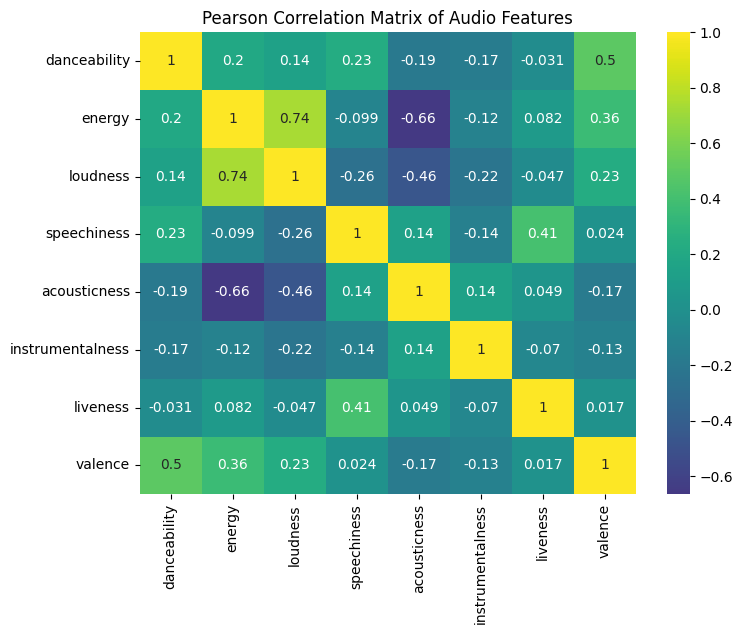

In [31]:
# Step 1: Compute Pearson correlation matrix
corr_matrix = scaled_df.corr(method='pearson')
print(corr_matrix)
# Step 2: Visualize with heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', center=0)
plt.title("Pearson Correlation Matrix of Audio Features")
plt.show()

Explained variance ratio: [0.32634712 0.20189466]
total Variance ratio: 0.5282417712028842


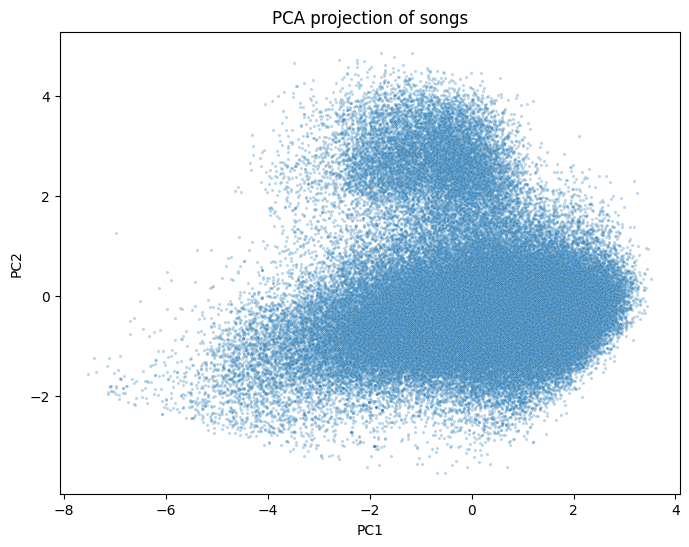

array([[-1.80071796,  0.53061548],
       [-2.51449856, -0.47484031],
       [-2.28240003,  0.51164817],
       ...,
       [-4.18796589,  0.08641578],
       [-4.59480529, -0.74893906],
       [-0.65115926, -1.09890953]], shape=(95430, 2))

In [32]:
#Dimensionality Reduction * PCA (Principal Component Analysis): 
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
x_pca = pca.fit_transform(X_scaled)
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("total Variance ratio:", np.sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8,6))
sns.scatterplot(x=x_pca[:,0], y=x_pca[:,1], s=5, alpha=0.3)
plt.title("PCA projection of songs")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
x_pca



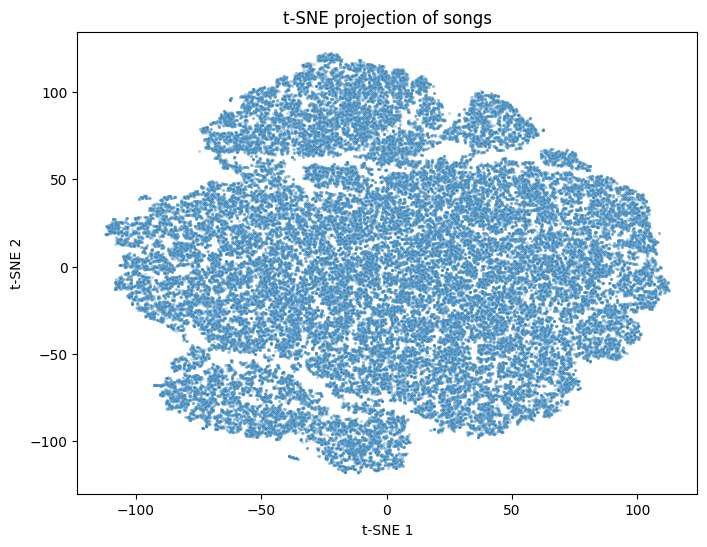

In [33]:
from sklearn.manifold import TSNE

# Run t-SNE on your scaled data
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], s=5, alpha=0.3)
plt.title("t-SNE projection of songs")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.tight_layout
plt.show()


In [34]:
# Elbow method to pick K (WCSS vs K)
wcss = []
K_range = range(1, 11)
for k in K_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    wcss.append(km.inertia_)   # inertia_ is total WCSS

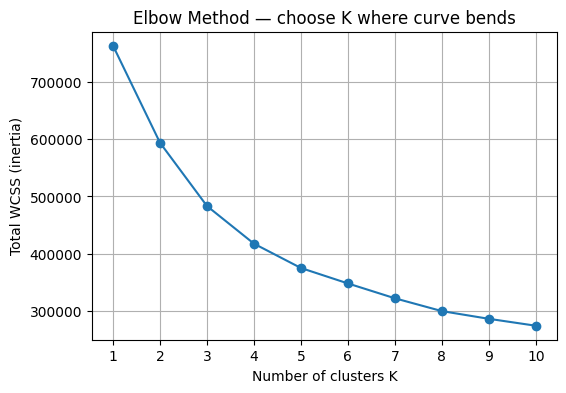

In [35]:
plt.figure(figsize=(6,4))
plt.plot(K_range, wcss, marker='o')
plt.xlabel('Number of clusters K')
plt.ylabel('Total WCSS (inertia)')
plt.title('Elbow Method — choose K where curve bends')
plt.xticks(K_range)
plt.grid(True)
plt.show()

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Suppose scaled_df is your scaled numeric data
check_sil_scores = []

# Try different values of K
for k in range(2, 5):   # silhouette needs at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(x_pca)
    score = silhouette_score(x_pca, labels)
    check_sil_scores.append(score)
    print(f"K={k}, Silhouette Score={score:.3f}")


K=2, Silhouette Score=0.405
K=3, Silhouette Score=0.479
K=4, Silhouette Score=0.409


In [37]:
#Clustering Techniques-K-Means Clustering K=3, Silhouette Score=0.479
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df1['clusters'] = kmeans.fit_predict(X_scaled)

print("Total clusters:", kmeans.n_clusters) # type: ignore

Total clusters: 3


In [38]:
df1

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,popularity_artists,release_year,duration_min,clusters
song_mask,,,,,,,,,,,,,,,
song1,161427,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,5078.0,22,1922,2.690450,2
song2,223440,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,5078.0,22,1922,3.724000,2
song3,208267,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,5078.0,22,1922,3.471117,2
song4,161933,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,5078.0,22,1924,2.698883,2
song5,167973,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,5078.0,22,1924,2.799550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
song95426,174800,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,16057.0,56,2019,2.913333,1
song95427,265846,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,929.0,36,2020,4.430767,1
song95428,82500,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,23.0,52,2020,1.375000,2


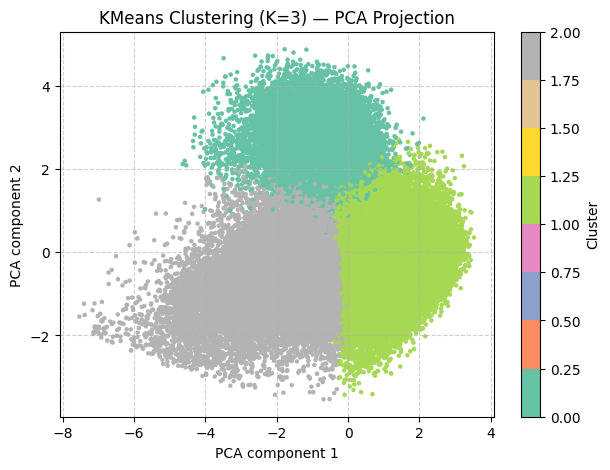

In [39]:
#  Visualize clusters in 2D using PCA (project features to 2 components)
plt.figure(figsize=(7,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df1['clusters'], s=5, cmap='Set2')
plt.title(f'KMeans Clustering (K={k}) — PCA Projection')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.grid(True, linestyle='--', alpha=0.6)
plt.colorbar(label='Cluster')
plt.show()

In [40]:
df1

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,popularity_artists,release_year,duration_min,clusters
song_mask,,,,,,,,,,,,,,,
song1,161427,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,5078.0,22,1922,2.690450,2
song2,223440,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,5078.0,22,1922,3.724000,2
song3,208267,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,5078.0,22,1922,3.471117,2
song4,161933,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,5078.0,22,1924,2.698883,2
song5,167973,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,5078.0,22,1924,2.799550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
song95426,174800,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,16057.0,56,2019,2.913333,1
song95427,265846,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,929.0,36,2020,4.430767,1
song95428,82500,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,23.0,52,2020,1.375000,2


In [41]:
df1.head(1)

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,popularity_artists,release_year,duration_min,clusters
song_mask,,,,,,,,,,,,,,,
song1,161427,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,5078.0,22,1922,2.69045,2


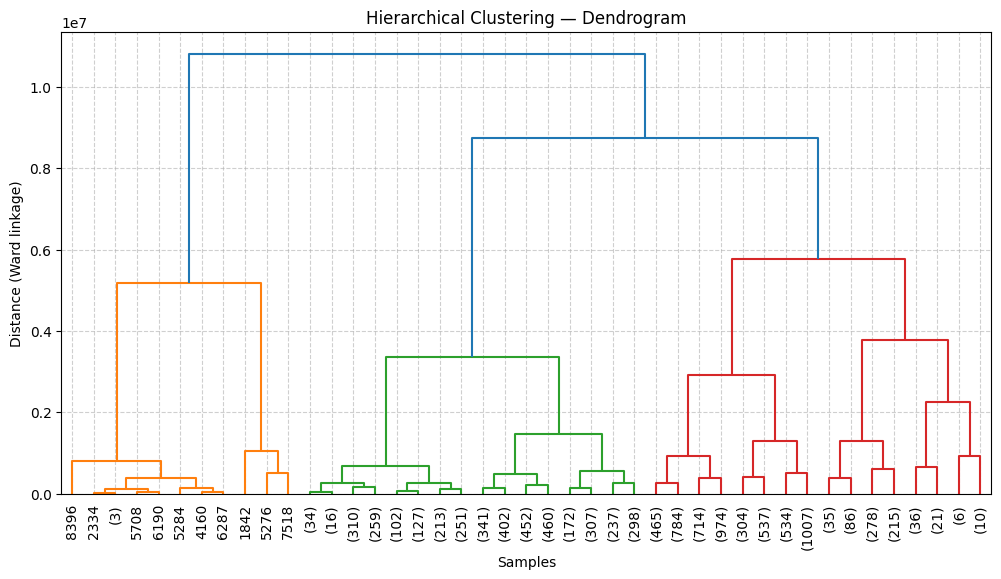

In [43]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Drop columns only in the copy
df1_work = df1.drop(columns=['followers','popularity_artists','release_year',
                             'duration_min','clusters'])

df_work_Sample=df1_work.sample(n=10000)
# Step 2: Scale the working copy
scaler = StandardScaler()
scaled_df_agg= scaler.fit_transform(df_work_Sample)

# Step 5: PCA on scaled data
x_pca = PCA(n_components=2, random_state=42).fit_transform(scaled_df_agg)

# Compute linkage matrix
# 'ward' linkage minimizes variance within clusters
Z = linkage(df_work_Sample, method='ward')

plt.figure(figsize=(12, 6))
dendrogram(Z,truncate_mode='level',p=5,leaf_rotation=90.,leaf_font_size=10.)
plt.title("Hierarchical Clustering — Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance (Ward linkage)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


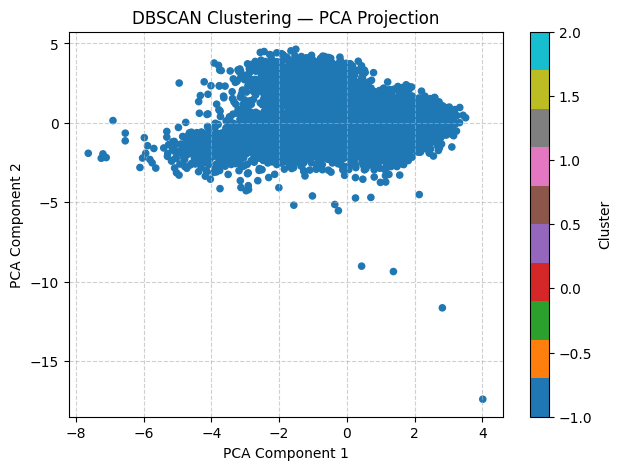

In [44]:
# DBSCAN (for discovering arbitrary-shaped clusters)
from sklearn.preprocessing import StandardScaler
X_scaled_DBS = StandardScaler().fit_transform(df_work_Sample)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.5, min_samples=5)
labels = db.fit_predict(X_scaled_DBS)

plt.figure(figsize=(7,5))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels, cmap='tab10', s=20)
plt.title("DBSCAN Clustering — PCA Projection")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True, linestyle='--', alpha=0.6)
plt.colorbar(label='Cluster')
plt.show()



In [45]:
# Cluster Evaluation and Interpretation
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


# Compute Silhouette Score
score = silhouette_score(df1, kmeans.labels_)
print(f"Silhouette Score: {score:.3f}")


Silhouette Score: -0.048


In [46]:
# Cluster Evaluation and Interpretation
from sklearn.metrics import davies_bouldin_score

score = davies_bouldin_score(X_scaled, df1['clusters'])
print(f"Davies-Bouldin Index for k=3: {score:.3f}")


Davies-Bouldin Index for k=3: 1.397


In [47]:
print(f"Inertia for k={k}: {kmeans.inertia_:.3f}")


Inertia for k=3: 483322.910


In [48]:
df1

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,popularity_artists,release_year,duration_min,clusters
song_mask,,,,,,,,,,,,,,,
song1,161427,0.563,0.1840,-13.757,0.0512,0.993,0.000016,0.3250,0.654,133.088,5078.0,22,1922,2.690450,2
song2,223440,0.427,0.1800,-15.375,0.0670,0.989,0.000000,0.1280,0.431,78.459,5078.0,22,1922,3.724000,2
song3,208267,0.511,0.2060,-15.514,0.0592,0.995,0.000000,0.4180,0.481,70.443,5078.0,22,1922,3.471117,2
song4,161933,0.676,0.4670,-12.393,0.1650,0.991,0.000000,0.2190,0.726,129.775,5078.0,22,1924,2.698883,2
song5,167973,0.650,0.2980,-13.806,0.1380,0.991,0.000000,0.3730,0.844,75.950,5078.0,22,1924,2.799550,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
song95426,174800,0.674,0.5680,-6.356,0.0408,0.116,0.000000,0.1650,0.640,166.107,16057.0,56,2019,2.913333,1
song95427,265846,0.528,0.6730,-3.639,0.0314,0.143,0.000000,0.0989,0.297,130.066,929.0,36,2020,4.430767,1
song95428,82500,0.609,0.0172,-28.573,0.1180,0.996,0.973000,0.1080,0.890,68.619,23.0,52,2020,1.375000,2


In [49]:
# Define mapping from cluster IDs to descriptive labels
cluster_map = {
    0: "Rap / spoken word tracks",
    1: "Party / Club tracks",
    2: "Acoustic / Mellow tracks"
}
# Apply mapping to your DataFrame
df1['cluster_label'] = df1['clusters'].map(cluster_map)


In [50]:
group1 = df1['cluster_label'].value_counts()
print(group1)

cluster_label
Party / Club tracks         52058
Acoustic / Mellow tracks    30797
Rap / spoken word tracks    12575
Name: count, dtype: int64


In [51]:
df1 = df1.join(df[['popularity_songs', 'name_song']], how='left')

In [52]:
cluster_profiles = df1.groupby('clusters')[Col_scaled.columns].mean()
print(cluster_profiles)

          danceability    energy   loudness  speechiness  acousticness  \
clusters                                                                 
0             0.662883  0.464396 -13.459935     0.831335      0.591973   
1             0.629490  0.695382  -7.583994     0.076012      0.255869   
2             0.489331  0.314403 -13.067871     0.056636      0.746013   

          instrumentalness  liveness   valence  
clusters                                        
0                 0.001845  0.441881  0.582115  
1                 0.050173  0.199596  0.667430  
2                 0.163383  0.179134  0.418261  


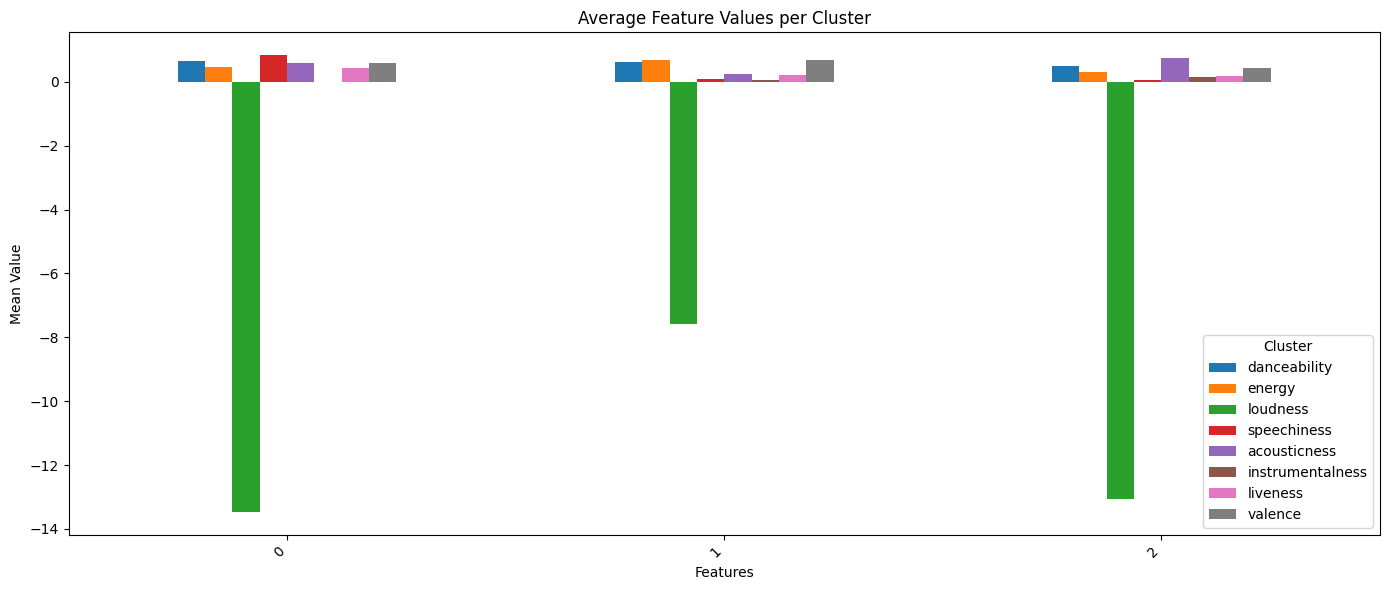

In [62]:
#Bar Charts showing average feature values per cluster
# Plot bar charts
fig, axis = plt.subplots(1, 1, figsize=(14,6))
cluster_profiles.plot(kind='bar', ax=axis)
axis.set_title("Average Feature Values per Cluster")
axis.set_ylabel("Mean Value")
axis.set_xlabel("Features")
axis.legend(title="Cluster")
axis.set_xticklabels(cluster_profiles.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

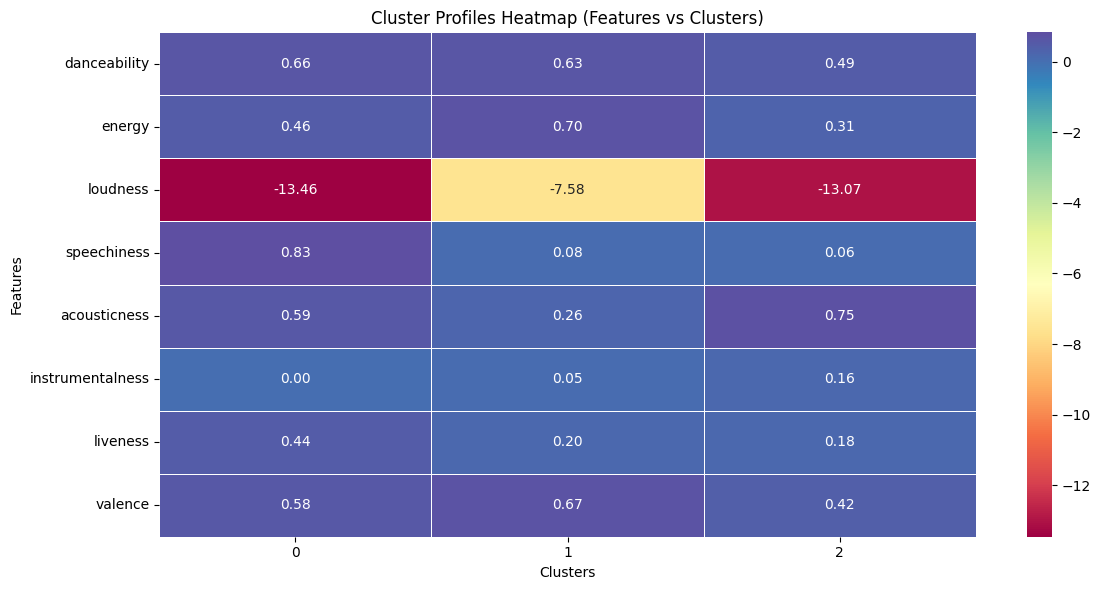

In [54]:
# Heatmaps 
plt.figure(figsize=(12,6))
sns.heatmap(cluster_profiles.T,cmap="Spectral",annot=True,fmt=".2f",linewidths=0.5)
plt.title("Cluster Profiles Heatmap (Features vs Clusters)")
plt.xlabel("Clusters")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

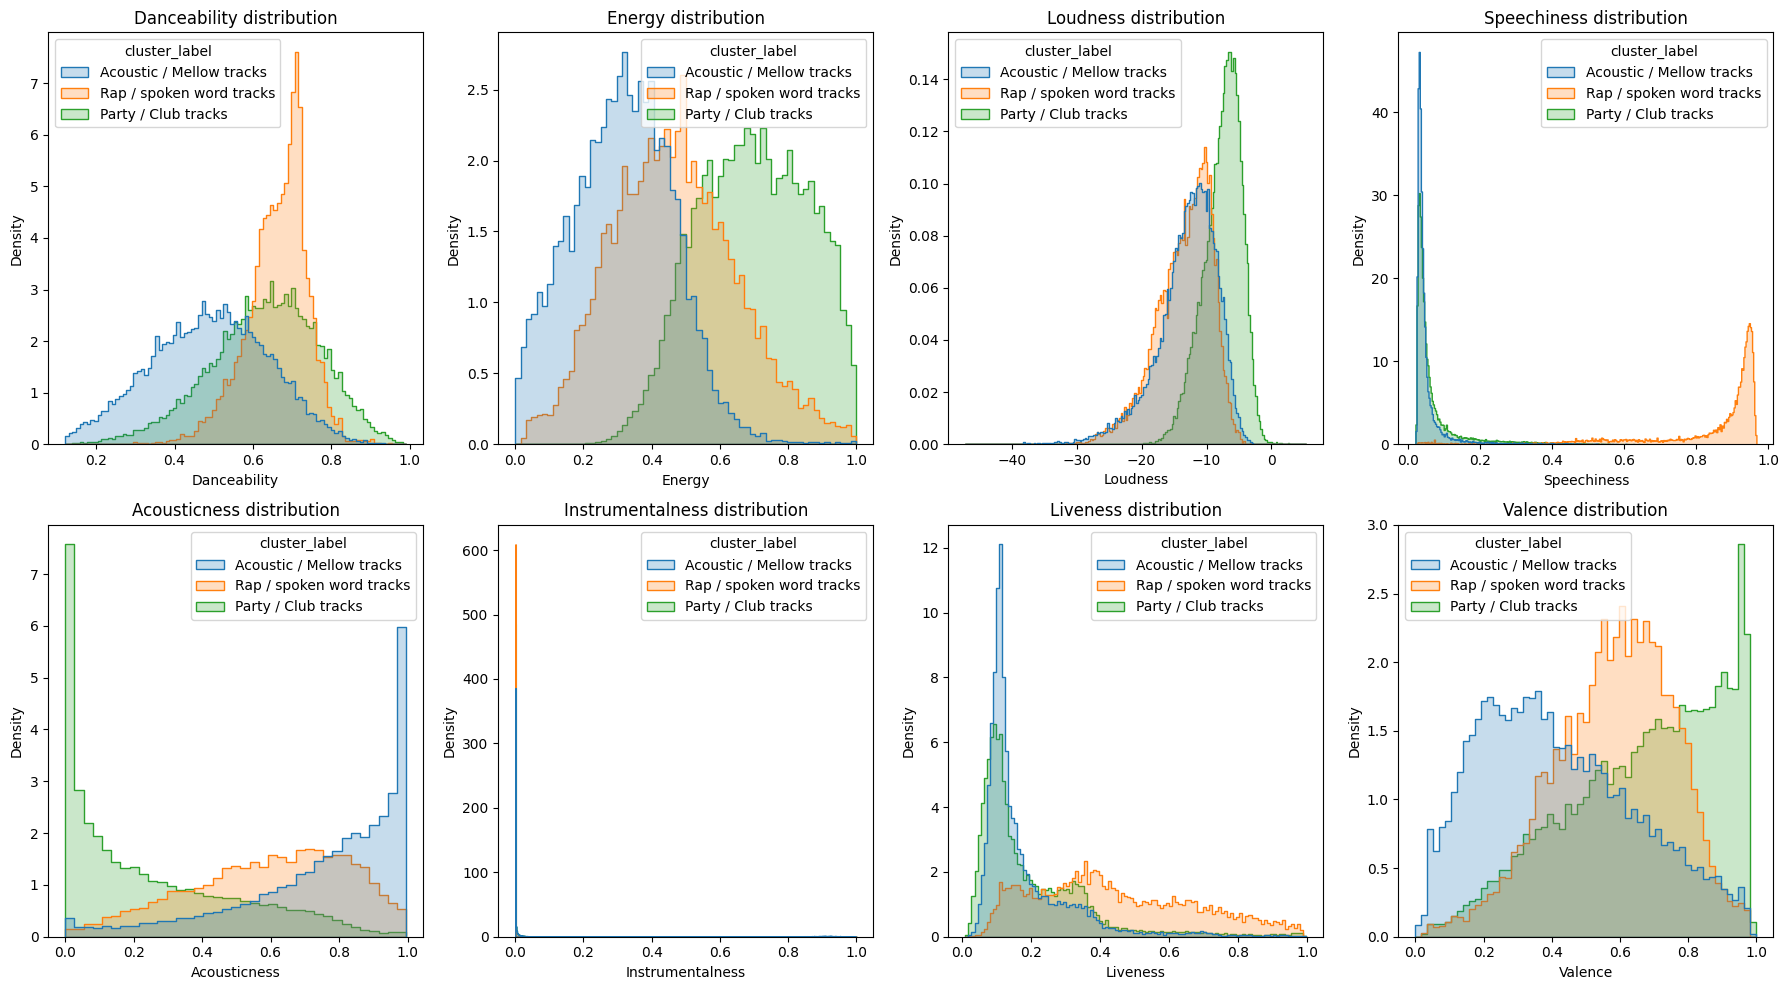

In [55]:
# Distribution plots 
import matplotlib.pyplot as plt
import seaborn as sns

features_to_plot = [
    'danceability', 'energy', 'loudness', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence'
]

# Create subplots grid
fig, axes = plt.subplots(2, 4, figsize=(18,10), sharey=False)

# Flatten axes array for easy iteration
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
    sns.histplot(data=df1,x=feature,hue="cluster_label",palette='tab10',element='step',stat='density',common_norm=False,ax=axes[i])
    axes[i].set_title(f"{feature.capitalize()} distribution")
    axes[i].set_xlabel(feature.capitalize())
    axes[i].set_ylabel("Density")

plt.tight_layout()
plt.show()


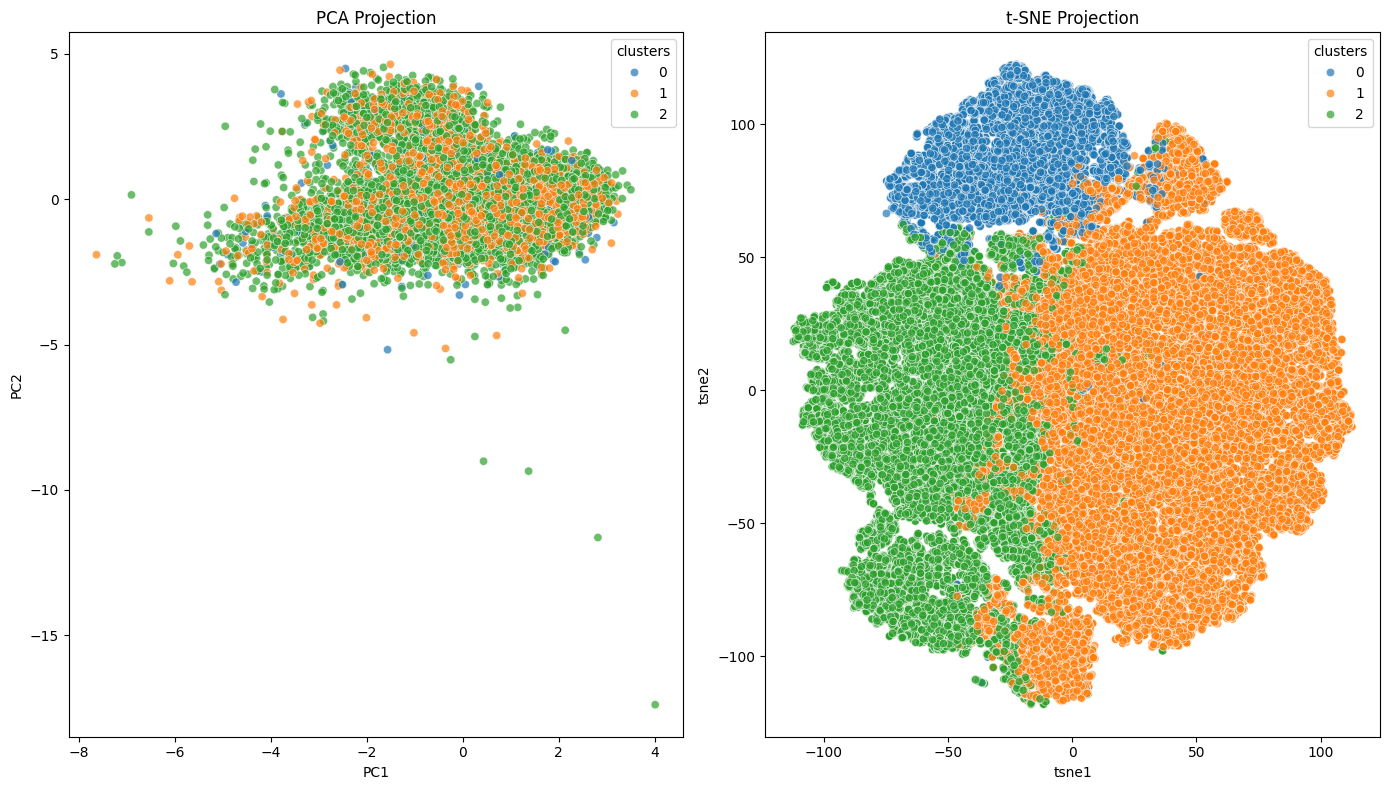

In [56]:
# 2D scatter plots using PCA/t-SNE with color-coded clusters
fig, axes = plt.subplots(1, 2, figsize=(14,8))
pca_df=pd.DataFrame(data=x_pca,columns=['PC1','PC2'])
finaldf = pd.concat([pca_df, df1['clusters'].reset_index(drop=True)], axis=1)

tsne_pca_df=pd.DataFrame(data=X_tsne,columns=['tsne1','tsne2'])
X_tsne_finaldf = pd.concat([tsne_pca_df, df1['clusters'].reset_index(drop=True)], axis=1)

# Left subplot: PCA
sns.scatterplot(data=finaldf, x='PC1', y='PC2',hue='clusters', palette='tab10',alpha=0.7,ax=axes[0])
axes[0].set_title("PCA Projection")

# Right subplot: t-SNE
sns.scatterplot( data=X_tsne_finaldf,x='tsne1', y='tsne2', hue='clusters',palette='tab10',alpha=0.7,ax=axes[1])
axes[1].set_title("t-SNE Projection")

plt.tight_layout()
plt.show()



In [57]:
df1.head(1)

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,popularity_artists,release_year,duration_min,clusters,cluster_label,popularity_songs,name_song
song_mask,,,,,,,,,,,,,,,,,,
song1,161427,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,5078.0,22,1922,2.69045,2,Acoustic / Mellow tracks,0,La Java


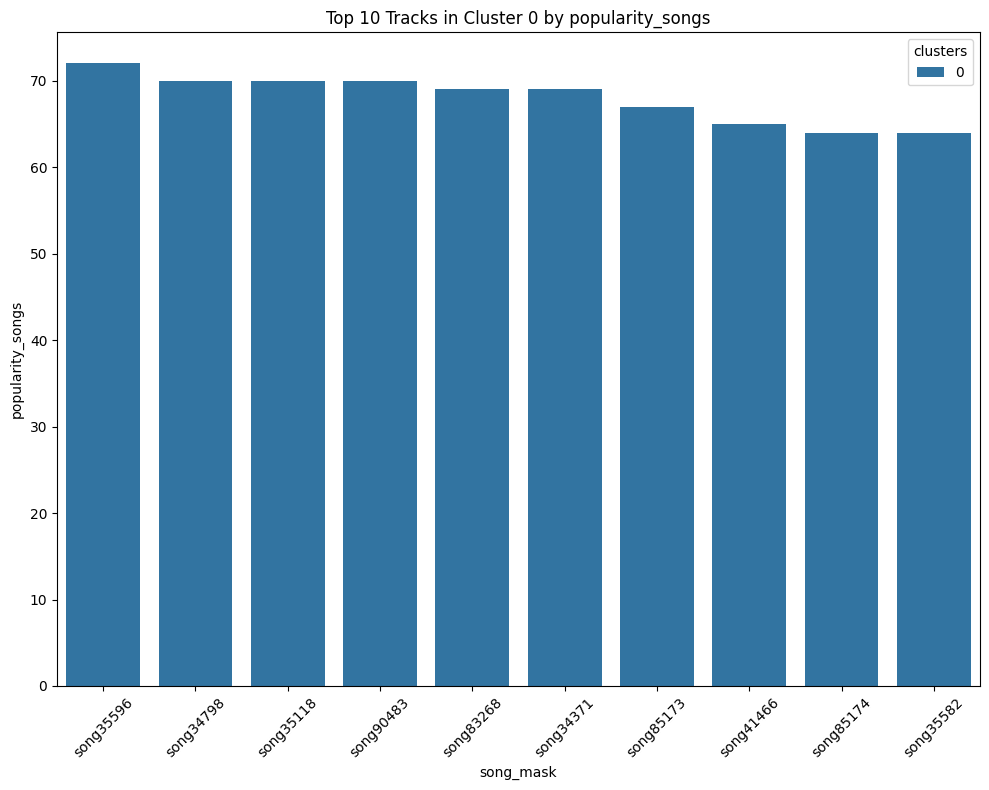

In [58]:
# show top tracks per cluster

# Filter cluster 0
cluster0_df = df1[df1['clusters'] == 0]

# Sort by popularity_songs (descending) and take top 10
top_tracks_cluster0 = (cluster0_df.sort_values('popularity_songs', ascending=False).head(10))

top_tracks_cluster0=pd.DataFrame(top_tracks_cluster0)

plt.figure(figsize=(10,8))
sns.barplot(data=top_tracks_cluster0, x='song_mask', y='popularity_songs',hue='clusters',palette='tab10')
plt.xticks(rotation=45)
plt.title("Top 10 Tracks in Cluster 0 by popularity_songs")
plt.tight_layout()
plt.show()

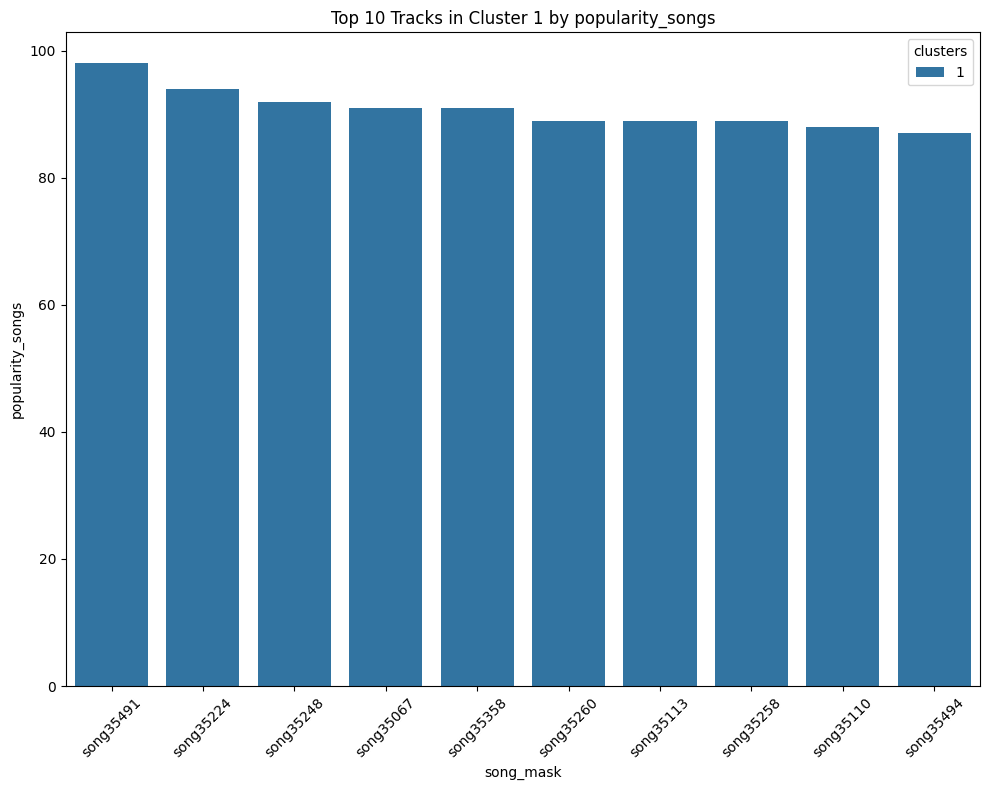

In [59]:
# Filter cluster 1
cluster1_df = df1[df1['clusters'] == 1]

# Sort by popularity_songs (descending) and take top 10
top_tracks_cluster1 = (cluster1_df.sort_values('popularity_songs', ascending=False).head(10))

top_tracks_cluster1=pd.DataFrame(top_tracks_cluster1)

plt.figure(figsize=(10,8))
sns.barplot(data=top_tracks_cluster1, x='song_mask', y='popularity_songs',hue='clusters',palette='tab10')
plt.xticks(rotation=45)
plt.title("Top 10 Tracks in Cluster 1 by popularity_songs")
plt.tight_layout()
plt.show()

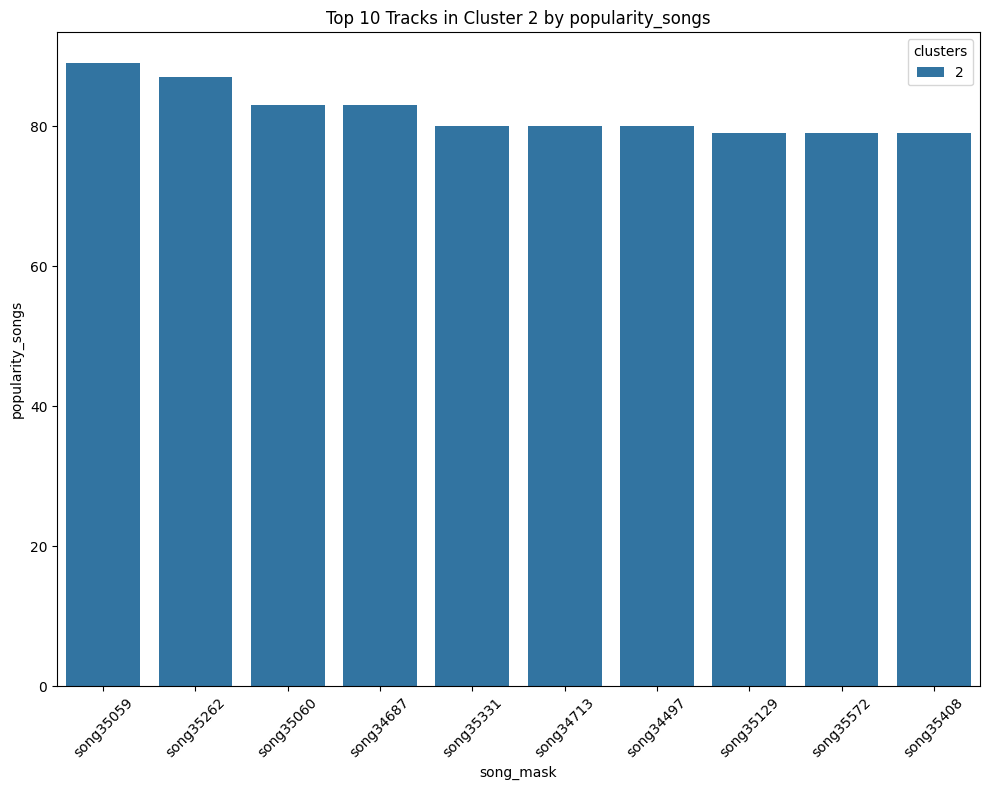

In [60]:
# Filter cluster 2
from altair import Bin


cluster2_df = df1[df1['clusters'] == 2]

# Sort by popularity_songs (descending) and take top 10
top_tracks_cluster2 = (cluster2_df.sort_values('popularity_songs', ascending=False).head(10))

top_tracks_cluster2=pd.DataFrame(top_tracks_cluster2)


plt.figure(figsize=(10,8))
sns.barplot(data=top_tracks_cluster2, x='song_mask', y='popularity_songs',hue='clusters',palette='tab10')
plt.xticks(rotation=45)
plt.title("Top 10 Tracks in Cluster 2 by popularity_songs")
plt.tight_layout()
plt.show()

In [61]:
df1.head(1)

,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,followers,popularity_artists,release_year,duration_min,clusters,cluster_label,popularity_songs,name_song
song_mask,,,,,,,,,,,,,,,,,,
song1,161427,0.563,0.184,-13.757,0.0512,0.993,0.000016,0.325,0.654,133.088,5078.0,22,1922,2.69045,2,Acoustic / Mellow tracks,0,La Java


In [ ]:
# Save each DataFrame to CSV
X_tsne_finaldf.to_csv("X_tsne_finaldf.csv", index=False)
finaldf.to_csv("finaldf_PCA.csv", index=False)
top_tracks_cluster2.to_csv("top_tracks_cluster2.csv", index=True)
top_tracks_cluster1.to_csv("top_tracks_cluster1.csv", index=True)
top_tracks_cluster0.to_csv("top_tracks_cluster0.csv", index=True)
df1.to_csv("clusterdata.csv", index=True)
cluster_profiles.to_csv("cluster_profiles.csv", index=True)